### Import the packages

In [33]:
import numpy as np
from scipy.integrate import solve_ivp

# For plotting
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['text.usetex'] = False

#### Define Variables and Initial Conditions

In [ ]:
t1 = 0.0
t2 = 2*2*np.pi

## initial conditions
x0 = np.array([0.0, 0.0, 0.0])

Modify the values of external electric field $E(t)$ and vector potential $A(t)$ and rerun the cells below to see the difference in results.
>Note that the code might fail for highly oscillatory fields and it might take some time to run.

In [24]:
# define external fields
omega = 1.0
def E(t):
    return np.array([0.02*np.sin(omega*t), 0.0])
def A(t):
    return np.array([0.02*(1.0 - np.cos(omega*t))/omega, 0.0])

#### Function definitions

In [25]:

## define the system of ODEs
def odes(t, x, p):
    E_field = E(t)
    vec_pot = A(t)

    def eps(p):
        return np.sqrt((p[0] - vec_pot[0])**2 + (p[1] - vec_pot[1])**2)
    
    def lamb(p):
        return (E_field[0]*(p[1] - vec_pot[1])- E_field[1]*(p[0] - vec_pot[0]))/eps(p)**2
    
    dx = np.zeros(3)
    dx[0] = 0.5*lamb(p)*x[1]
    dx[1] = lamb(p)*(1.0 - 2.0*x[0]) - 2.0*eps(p)*x[2]
    dx[2] = 2.0*eps(p)*x[1]

    return dx

# Define the function which calculates the value of the function at a given momentum 
# and return only the value at time t2.
def fatp(p1, p2):
    t_span = (t1,t2)
    sol = solve_ivp(lambda t, x: odes(t, x, [p1, p2]), t_span, x0)
    return sol.y[0][-1]

#### Calculation

In [39]:
## Generate the data

# Generate the x and y values
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x, y)

# Evaluate the function at each point
f = np.vectorize(fatp)
Z = f(X, Y)

#### Plotting

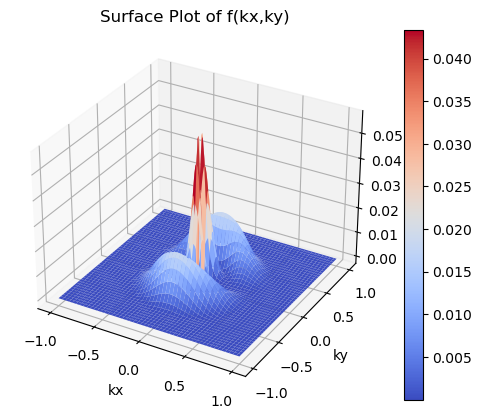

In [43]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sp = ax.plot_surface(X, Y, Z,cmap=cm.coolwarm)
fig.colorbar(sp)

# Add labels and title
ax.set_xlabel(r'kx')
ax.set_ylabel(r'ky')
ax.set_zlabel('f(kx,ky)')
ax.set_title('Surface Plot of f(kx,ky)')

# Show the plot
plt.show()

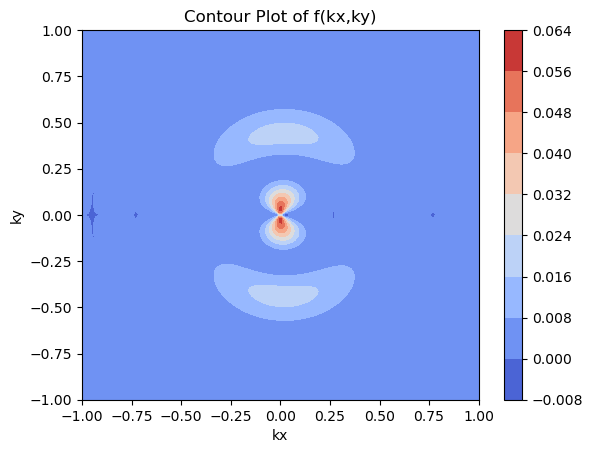

In [41]:
## Contour Plot
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cp = ax2.contourf(X, Y, Z, cmap=cm.coolwarm)
ax2.set_xlabel('kx')
ax2.set_ylabel('ky')
ax2.set_title('Contour Plot of f(kx,ky)')
fig2.colorbar(cp) # Add a colorbar to a plot
